In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('doncic_all_games_data.csv')
data['misses/count_binary'] = np.where(data['misses/count'] == 'makes', 1, 0)
data = data[data['basket_type'] != 'free']
data.shape

(175, 12)

In [10]:
data.head()

,Time,player_name,Series Game,Score,quarter,basket_type,short_type,short_range,misses/count,player_team,Time_dumy,misses/count_binary
0,11:11.0,L.Doncic,1,0-4,1.0,2-pt,jump,9,misses,Dallas,2022-06-05 11:11:00,0
1,9:16.0,L.Doncic,1,2-9,1.0,2-pt,jump,19,makes,Dallas,2022-06-05 09:16:00,1
2,7:31.0,L.Doncic,1,4-12,1.0,3-pt,jump,26,misses,Dallas,2022-06-05 07:31:00,0
3,7:01.0,L.Doncic,1,6-14,1.0,2-pt,jump,4,makes,Dallas,2022-06-05 07:01:00,1
4,5:47.0,L.Doncic,1,6-18,1.0,3-pt,jump,26,misses,Dallas,2022-06-05 05:47:00,0


In [46]:
data = data.reset_index(drop = True).reset_index()

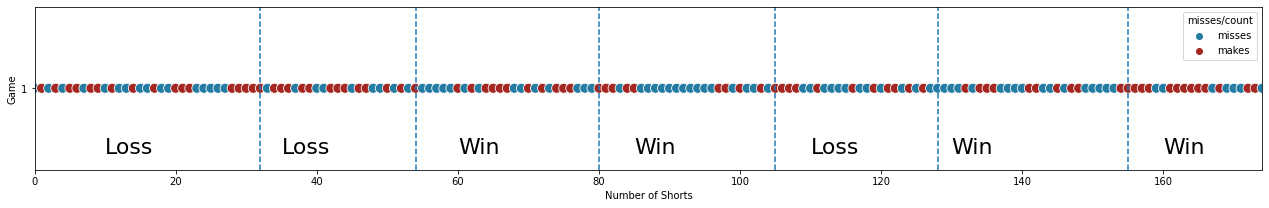

In [126]:
plt.figure(figsize=(22, 3))

plt.text(10, 0.96, 'Loss', fontsize = 22)
plt.text(35, 0.96, 'Loss', fontsize = 22)
plt.text(60, 0.96, 'Win', fontsize = 22)
plt.text(85, 0.96, 'Win', fontsize = 22)
plt.text(110, 0.96, 'Loss', fontsize = 22)
plt.text(130, 0.96, 'Win', fontsize = 22)
plt.text(160, 0.96, 'Win', fontsize = 22)

sns.scatterplot(x = 'index', y = 'Game', hue = 'misses/count', data = data, palette = ['#257ca3', '#A42821'], s = 100)
# plt.xticks([0, 32, 54, 80, 105, 128, 155])
plt.yticks([1])
# plt.tight_layout()
plt.autoscale(tight=True)
plt.axvline(32, ls = '--')
plt.axvline(54, ls = '--')
plt.axvline(80, ls = '--')
plt.axvline(105, ls = '--')
plt.axvline(128, ls = '--')
plt.axvline(155, ls = '--')
plt.xlabel('Number of Shorts')

# plt.show()
# plt.savefig('test.png', bbox_inches='tight', dpi = 120)

In [7]:
data = pd.read_csv('doncic_all_games_data.csv')
data_gsw_jazz = pd.read_csv('doncic_series_games(jazz_gsw)_data.csv')

data['oponent_team'] = 'suns'
doncic_concat_df = pd.concat([data, data_gsw_jazz])

doncic_concat_df['misses/count_binary'] = np.where(doncic_concat_df['misses/count'] == 'makes', 1, 0)

doncic_concat_df = doncic_concat_df[doncic_concat_df['basket_type'] != 'free']

# calculating the streaks 
doncic_concat_df['streak'] = doncic_concat_df['misses/count_binary'].groupby((doncic_concat_df['misses/count_binary'] != doncic_concat_df.groupby(['Series Game', 'oponent_team'])['misses/count_binary'].shift()).cumsum()).cumcount() + 1

In [11]:
data.shape, data_gsw_jazz.shape, doncic_concat_df.shape

((228, 12), (259, 12), (487, 12))

In [17]:
cross_df = pd.crosstab(doncic_concat_df['misses/count'], doncic_concat_df['Series Game'])
cross_df = cross_df.reset_index()
cross_df['Total'] = cross_df.sum(axis = 1)
cross_df

Series Game,misses/count,1,2,3,4,5,6,7,Total
0,makes,23,25,24,30,31,19,12,164
1,misses,29,20,26,42,42,29,7,195


In [18]:
cross_streak_df = pd.crosstab(doncic_concat_df['misses/count'], doncic_concat_df['streak'])
cross_streak_df = cross_streak_df.reset_index()
cross_streak_df['Total'] = cross_streak_df.sum(axis = 1)
cross_streak_df

streak,misses/count,1,2,3,4,5,6,7,8,9,10,11,Total
0,makes,96,43,17,4,3,1,0,0,0,0,0,164
1,misses,96,50,23,11,8,2,1,1,1,1,1,195


In [19]:
makes_prob = cross_streak_df[[1,2,3,4]].loc[0] / 122
misses_prob = cross_streak_df[[1,2,3,4]].loc[1] / 72

prob_df = pd.DataFrame()
prob_df['makes_prob'] = makes_prob
prob_df['misses_prob'] = misses_prob
prob_df = prob_df.reset_index()

prob_df['converg_prob'] = [0.585, 0.448, 0.395, 0.235]

Text(0.5, 1.0, 'Hot hand (short convergence probability) of Luka doncic in Playoffs(2021-22 season)')

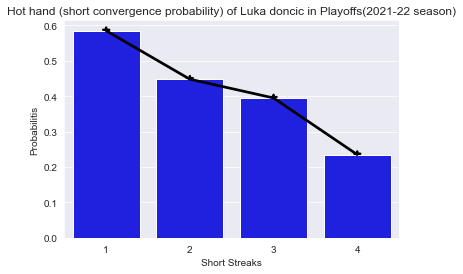

In [23]:
sns.set_style('darkgrid')
ax = sns.barplot(x = 'streak', y = 'converg_prob', data = prob_df, color = 'b')
ax = sns.pointplot(x = 'streak', y = 'converg_prob', data = prob_df, color = 'black', markers = "*")#prob_df[prob_df['streak'] <= 4])
ax.set(xlabel='Short Streaks', ylabel='Probabilitis')
ax.set_title('Hot hand (shorts convergence probability) of Luka doncic in Playoffs(2021-22 season)')

In [3]:
# giannis_data = pd.read_csv('giannis_all_games_data.csv')

In [8]:
# giannis_data.head()